# Assignment 8B - Model Evaluation

###### For this assignment, we will revisit the solution you submitted to assignment 8A (the previous assignment), repeating the classification experiment that was carried out.

I chose a different dataset because the one I had previously used had multiple classes. This time, I chose a dataset on Haberman's survival, a different dataset of breast cancer patients. Much of the below code is a direct copy from Assignment 8A.

The data:
- Name: Haberman's survival
- Nature of data: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
- Instances: 306 total
- Missing values: No

Features:
1. Age of patient at time of operation (numerical) 
2. Patient's year of operation (year - 1900, numerical) 
3. Number of positive axillary nodes detected (numerical) 
4. Survival status (class attribute) 
    - 1 = the patient survived 5 years or longer 
    - 2 = the patient died within 5 year

In [41]:
# imports used in 8A
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pydotplus
import collections
from sklearn import tree
from IPython.core.display import Image
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# added for 8B
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [42]:
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', 
                   names=['Age', 'YearOfSurgery', 'NumOfAxillaryNodes', 'Class'], header=None)
# a summary of the data
data

Age  YearOfSurgery  NumOfAxillaryNodes  Class
0     30             64                   1      1
1     30             62                   3      1
2     30             65                   0      1
3     31             59                   2      1
4     31             65                   4      1
..   ...            ...                 ...    ...
301   75             62                   1      1
302   76             67                   0      1
303   77             65                   3      1
304   78             65                   1      2
305   83             58                   2      2

[306 rows x 4 columns]

In [43]:
# a description of what the data contains
data.describe(include="all")

Age  YearOfSurgery  NumOfAxillaryNodes       Class
count  306.000000     306.000000          306.000000  306.000000
mean    52.457516      62.852941            4.026144    1.264706
std     10.803452       3.249405            7.189654    0.441899
min     30.000000      58.000000            0.000000    1.000000
25%     44.000000      60.000000            0.000000    1.000000
50%     52.000000      63.000000            1.000000    1.000000
75%     60.750000      65.750000            4.000000    2.000000
max     83.000000      69.000000           52.000000    2.000000

In [44]:
data.var()

Age                   116.714583
YearOfSurgery          10.558631
NumOfAxillaryNodes     51.691118
Class                   0.195275
dtype: float64

In [45]:
# the first five rows of data
data.head()

Age  YearOfSurgery  NumOfAxillaryNodes  Class
0   30             64                   1      1
1   30             62                   3      1
2   30             65                   0      1
3   31             59                   2      1
4   31             65                   4      1

In [46]:
# the data types of the data
data.dtypes

Age                   int64
YearOfSurgery         int64
NumOfAxillaryNodes    int64
Class                 int64
dtype: object

In [47]:
# since this assignment says to choose a binary dataset, I will choose two columns from the data (age and nodes)
X = data[['Age', 'NumOfAxillaryNodes']].values
Y = data['Class'].values.tolist()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [48]:
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(X_train, Y_train)

In [49]:
Y_pred = dtc.predict(X_test)
Y_prob = dtc.predict_proba(X_test)
Y_prob = Y_prob[:,0]

#### The accuracy of your model on the test data

In [50]:
accuracy_score(Y_test, Y_pred)

0.6956521739130435

In [51]:
# those who survived more than 5 years post surgery
Y_test.count(1)

69

In [52]:
# those who survived less than 5 years post surgery
Y_test.count(2)

23

An accuracy score of 1 would mean 100% accuracy. Since this is about 0.7 (70%), it is a fairly good score. However, it is still low and might not be the best way to evaluate the model.

#### The precision and recall values

In [53]:
precision = precision_score(Y_test, Y_pred, average='binary', pos_label=1)
precision

0.7808219178082192

In [54]:
recall = recall_score(Y_test, Y_pred, average='binary', pos_label=1)
recall

0.8260869565217391

A high precision score means low false positives, whereas a high recall score means low false negatives. The precision score is .78 while the recall score is .83, both on the higher end (with 1 being the perfect score). These are good results for evaulating the model.

#### A classification report (scikit-learn has a function that can create this for you)

In [55]:
target_names = ['Survived', 'Died']
print(classification_report(Y_test, dtc.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

    Survived       0.78      0.83      0.80        69
        Died       0.37      0.30      0.33        23

    accuracy                           0.70        92
   macro avg       0.57      0.57      0.57        92
weighted avg       0.68      0.70      0.69        92



The first two columns of the classification report are the same as the precision score and recall score, whereas the support column is just the number of people that survived or died. This classification report shows much better numbers for the survival cases over the death cases, mostly due to the numbers of cases (69 vs 23). This is an okay evaluation of the model. 

#### The confusion matrix for this experiment

In [56]:
confusion_matrix(Y_test, Y_pred, labels=[1,2])

array([[57, 12],
       [16,  7]])

It takes a moment to understand this confusion matrix - the two across the top are the survival cases, where as the two on the bottom are the death cases, both of these equating to the numbers previously shown. Top left ends up being true negative, top right is false negative, bottom left is false positive, bottom right is true positive. This equates to 64 true cases against 28 false cases (64/92 = ~70%).

#### An ROC curve

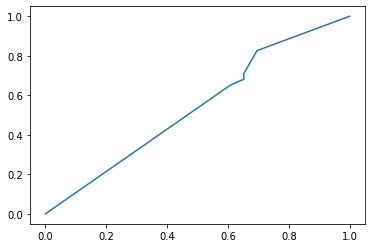

In [57]:
fpr, tpr, threshold = roc_curve(Y_test, Y_prob, pos_label=1)

plt.plot(fpr, tpr)
plt.show()

In [58]:
roc_auc = auc(fpr, tpr)
roc_auc

0.5387523629489603

The roc score represents the area under the curve (about 54% in this case), showing that it is middling in evaluation potential. 

#### A Precision/Recall curve

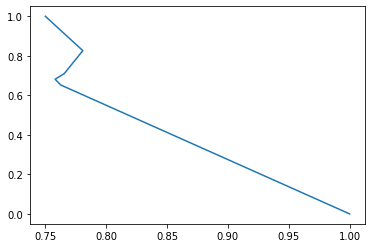

In [59]:
precision, recall, thresholds = precision_recall_curve(Y_test, Y_prob, pos_label=1)

plt.plot(precision, recall)
plt.show()

In [60]:
average_precision = average_precision_score(Y_test, Y_pred)
average_precision

0.7294050343249427

This graph represents precision and recall, with the ideal being 1 for both (top right corner). Ideal is not always possible. The slope on this graph is steady and it looks promising when making predictions, but it shows that there is a lot of room for improvement. 